<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_Ciencia_de_Dados/blob/main/IMT_PF1_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Case: **Drink Data**

Neste case você vai empregar características químicas de bebidas para sua classificação.

In [ ]:
df_train = pd.read_csv('https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/data/drink_train.csv')
display(df_train.head(), df_train.shape)

df_test = pd.read_csv('https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/data/drink_test.csv')
display(df_test.head(), df_test.shape)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,drink
0,13.51,1.80,2.65,19.0,110.0,2.35,2.53,0.29,1.54,4.20,1.10,2.87,1095.0,0
1,12.08,1.39,2.50,22.5,84.0,2.56,2.29,0.43,1.04,2.90,0.93,3.19,385.0,1
2,13.67,1.25,1.92,18.0,94.0,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630.0,1
3,12.84,2.96,2.61,24.0,101.0,2.32,0.60,0.53,0.81,4.92,0.89,2.15,590.0,2
4,12.42,4.43,2.73,26.5,102.0,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365.0,1


(133, 14)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,drink
0,13.32,3.24,2.38,21.5,92.0,1.93,0.76,0.45,1.25,8.42,0.55,1.62,650.0,2
1,13.50,1.81,2.61,20.0,96.0,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845.0,0
2,12.42,2.55,2.27,22.0,90.0,1.68,1.84,0.66,1.42,2.70,0.86,3.30,315.0,1
3,12.93,3.80,2.65,18.6,102.0,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770.0,0
4,13.73,4.36,2.26,22.5,88.0,1.28,0.47,0.52,1.15,6.62,0.78,1.75,520.0,2


(45, 14)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()

X_train = scaler.fit_transform(df_train.drop(columns='drink'))
X_test = scaler.transform(df_test.drop(columns='drink'))

# Exercício 1. **PCA Classification**

Neste exercício você fará uma classificação das bebidas com base no conjunto de dados preditores reduzido a componentes principais.






## Exercício 1.1.

Faça uma redução de dimensionalidade do conjunto de treinamento para o menor número de componentes principais que representem ao menos 80% da variância dos dados.

Q1. Qual a quantidade de componentes principais necessária para atingir 80% da variação dos dados?

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
pca.fit(X_train)

PCA()

In [ ]:
pca.explained_variance_ratio_.cumsum()

array([0.36494338, 0.54923446, 0.67158785, 0.74483122, 0.80979423,
       0.859976  , 0.90003166, 0.92688246, 0.94990825, 0.96538838,
       0.97925691, 0.99205056, 1.        ])

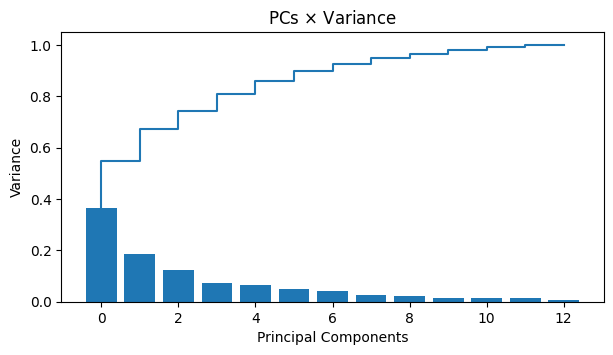

In [ ]:
plt.figure(figsize=(7,3.5))

plt.bar(np.arange(0,len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.step(np.arange(0,len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Principal Components")
plt.ylabel("Variance")
plt.title("PCs $\\times$ Variance")
plt.show()


## Exercício 1.2.

Empregue somente os componentes principais necessários para atingir 80% da variação dos dados para criar um modelo de classificação com o modelo de k-vizinhos mais próximos com k=10.

Q2. Qual a acuracidade obtida pelo modelo no conjunto de teste fornecido?

Q3. Qual o total de falsos negativos encontrados para as classes 0 e 1?

In [ ]:
X_train = pca.transform(X_train)[:,0:5]
X_test = pca.transform(X_test)[:,0:5]

In [ ]:
X_train.shape, X_test.shape

((133, 5), (45, 5))

In [ ]:
# from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

y_train = df_train.drink
y_test = df_test.drink

# clf = LogisticRegression()
clf = KNeighborsClassifier(10)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print('\nMatriz de Confusão:\n')
print(cm)
print()


Classification Report:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.89      0.94        18
           2       0.92      1.00      0.96        12

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45


Matriz de Confusão:

[[15  0  0]
 [ 1 16  1]
 [ 0  0 12]]



# Variações do Tema

Aqui foi empregado um único modelo de classificação com hiperparâmetros já fornecidos e uma "seleção de features".

1. E se você tivesse que selecionar entre diferentes modelos? Você deveria neste caso empregar um CV, obtendo médias da acuracidade ou outra métrica de seleção.

2. E se você tivesse que selecionar entre diferentes hiperparâmetros? Você deveria neste caso empregar um GridSearch, pois pode haver grande número de parâmetros a decidir.

3. E se no lugar do PCA, para reduzirmos a dimensionalidade, quisermos empregar apenas as *features* mais relevantes? Neste caso, você deveria verificar o ganho de informação (ou informação mútua) dos atributos para selecionar aqueles mais relevantes.

4. Neste, e nos demais exercícios, nenhum encode dos dados é necessária. Mas nem sempre será assim...


# Exercício 2. **Clustering**

Neste exercício você fará uma Clusterização dos dados de treinamento das bebidas com o objetivo de medir a *Taxa Correta de Classificação* (Acurácia de Clusterização).






## Exercício 2.1.

Aplique o modelo K-médias (`random_state=0`) sobre os dados de treinamento normalizados.

Q4. Qual a Taxa Correta de Classificação para o K-médias?



## Exercício 2.2.

Aplique agora o modelo de clusterização hierárquica, um com o *esquema de ligação* padrão (`ward`) e outro com esquema de ligação que corresponde à distância máxima do elemento ao grupo.

Q5. Qual dos 3 modos de clusterização apresenta Taxa Correta de Classificação maior e qual é esse valor?

Q6. No melhor modelo (questão anterior) os valores da respectiva 'precisão' da classe 0 e 'recall' da classe 1?

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()

X_train = scaler.fit_transform(df_train.drop(columns='drink'))

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering

kmeans  = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X_train)
hclust1 = AgglomerativeClustering(n_clusters=3).fit(X_train)
hclust2 = AgglomerativeClustering(n_clusters=3,linkage='complete').fit(X_train)

cm_kmeans  = confusion_matrix(y_train, kmeans.labels_)
cm_hclust1 = confusion_matrix(y_train, hclust1.labels_)
cm_hclust2 = confusion_matrix(y_train, hclust2.labels_)

print(cm_kmeans, '\n\n', cm_hclust1, '\n\n', cm_hclust2)

[[ 0 44  0]
 [ 4  4 45]
 [36  0  0]] 

 [[ 0  0 44]
 [45  3  5]
 [ 1 35  0]] 

 [[32  0 12]
 [28  2 23]
 [ 3 33  0]]


In [ ]:
cm_kmeans  = cm_kmeans[[2,0,1],:]
cm_hclust1 = cm_hclust1[[1,2,0],:]
cm_hclust2 = cm_hclust2[[0,2,1],:]

for cm in [cm_kmeans, cm_hclust1, cm_hclust2]:
  print(cm, '\n', cm.diagonal().sum() / cm.sum())


[[36  0  0]
 [ 0 44  0]
 [ 4  4 45]] 
 0.9398496240601504
[[45  3  5]
 [ 1 35  0]
 [ 0  0 44]] 
 0.9323308270676691
[[32  0 12]
 [ 3 33  0]
 [28  2 23]] 
 0.6616541353383458


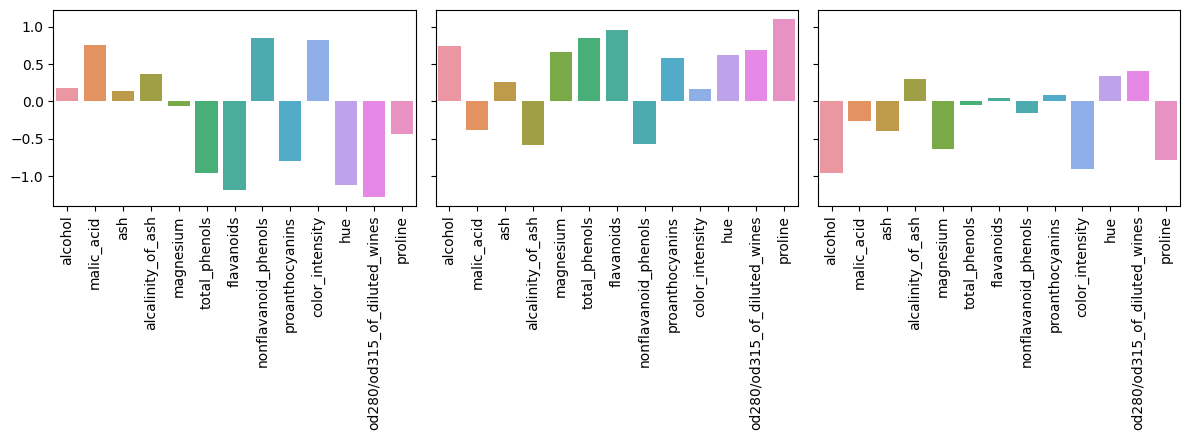

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(12,4.5),sharey=True)

ax[0].tick_params(axis='x', labelrotation = 90)
sns.barplot(x=df_train.columns[0:-1],y=kmeans.cluster_centers_[0],ax=ax[0])
ax[1].tick_params(axis='x', labelrotation = 90)
sns.barplot(x=df_train.columns[0:-1],y=kmeans.cluster_centers_[1],ax=ax[1])
ax[2].tick_params(axis='x', labelrotation = 90)
sns.barplot(x=df_train.columns[0:-1],y=kmeans.cluster_centers_[2],ax=ax[2])

plt.tight_layout()
plt.show()

In [ ]:
kmeans.cluster_centers_.mean(axis=1)

array([-0.20948569,  0.39093992, -0.23079308])

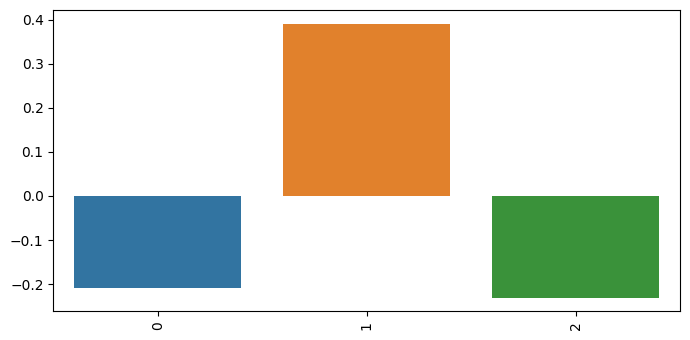

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(7,3.5),sharey=True)

ax.tick_params(axis='x', labelrotation = 90)
sns.barplot(x=[0,1,2],y=kmeans.cluster_centers_.mean(axis=1),ax=ax)

plt.tight_layout()
plt.show()

# Variações do Tema

1. O modelo de clusterização também poderia ser empregado utilizando dados com redução de dimensionalidade (PCA)? Claro!

2. Aqui o número de clusters é dado pelo número de classes pois estamos buscando a taxa de erro de classificação do modelo. Se você quiser buscar o melhor número de clusters? Como fazer? Empregue nesse caso o cálculo de silhueta. O método gráfico é mais subjetivo e não empregaríamos em uma avaliação.

3. Não desenvolvemos aqui nenhuma caracterização dos clusters obtidos. Mas nesta solução você já encontra gráficos dos valores médios de cada grupo úteis para essa caracterização.


# Case: **Dolar Prediction**

Neste case você vai empregar técnicas de séries temporais para previsão de cotações do dólar.

In [ ]:
df = pd.read_csv('https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/data/dolar_MA_2020_2021.csv')
display(df.head(), df.shape)

,Date,Adj Close
0,2020-03-27,5.022600
1,2020-03-30,5.104629
2,2020-03-31,5.192700
3,2020-04-01,5.203500
4,2020-04-02,5.248200


(205, 2)

# Exercício 3. **Time Series**

Neste exercício você vai empregar um modelo MA (médias móveis) para uma previsão de valores do dólar a partir de valores diários.






## Exercício 3.1.

Faça as transformações necessárias na série acima e o teste de Dickey-Fuller para verificar se a série é estacionária para podermos implementar um modelo de médias móveis.

Q7. A série é estacionária? Qual o p-value obtido no teste de Dickey-Fuller?

In [ ]:
df = df.set_index(pd.to_datetime(df['Date']))
# df = df.set_index(pd.DatetimeIndex(df['Date'],freq='B')) # to avoid warnings
df = df.drop(columns='Date')
df.tail()

,Adj Close
Date,
2021-01-01,5.1921
2021-01-04,5.1919
2021-01-05,5.2953
2021-01-06,5.2841
2021-01-07,5.3129


In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -3.064521
p-value: 0.029293


## Exercício 3.2.

Você vai empregar a função ARIMA (`statsmodels`) para implementar um modelo de médias móveis. Determine aqui o tamanho da janela de médias móveis que deve ser empregado com base em um dos gráficos de auto correlação (qual?).

Q8. O tamanho da janela móvel significativa obtida?

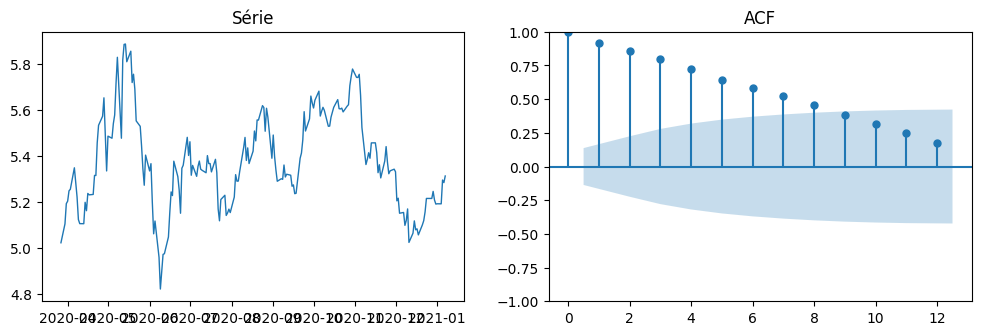

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,3.5))
ax1.plot(df,linestyle='solid',alpha=1,lw=1)
ax1.title.set_text('Série')
y=plot_acf(df,lags=12,ax=ax2, title="ACF")


## Exercício 3.3.

Aplique agora o modelo MA com parâmetros obtidos.

Q9. Qual o AIC obtido? Há algum coeficiente não significativo no modelo?



In [ ]:
# informe aqui os parâmetros, o código abaixo já está pronto para execução do modelo

p = 0; d = 0; q = 8

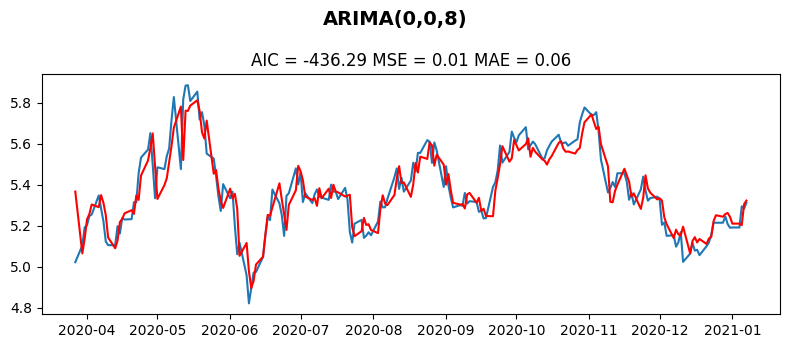

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                  205
Model:                 ARIMA(0, 0, 8)   Log Likelihood                 228.146
Date:                Sun, 19 Nov 2023   AIC                           -436.291
Time:                        18:29:46   BIC                           -403.061
Sample:                    03-27-2020   HQIC                          -422.850
                         - 01-07-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3673      0.035    152.835      0.000       5.299       5.436
ma.L1          0.8523      0.056     15.126      0.000       0.742       0.963
ma.L2          0.8744      0.075     11.596      0.0

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarnings('default')

from statsmodels.tsa.arima.model import ARIMA

plt.figure(figsize=(8,3.5))

model = ARIMA(df, order=(p,d,q))
results = model.fit(method_kwargs={'maxiter':1000})

plt.plot(df,label='real')
plt.plot(results.fittedvalues, color='red',label='model')

plt.title(f'AIC = {results.aic:.2f} MSE = {results.mse:.2f} MAE = {results.mae:.2f}')
plt.suptitle(f'ARIMA({p},{d},{q})',weight='bold',fontsize=14)

plt.tight_layout()
plt.show()

print(results.summary())


## Exercício 3.4.

Aplique o modelo acima para uma previsão do valor do dólar para os próximos 10 dias.

Q10. Qual o valor previsão do modelo para o valor do dólar nos próximos 10 dias (2021-01-18)?

In [ ]:
df.tail()

,Adj Close
Date,
2021-01-01,5.1921
2021-01-04,5.1919
2021-01-05,5.2953
2021-01-06,5.2841
2021-01-07,5.3129


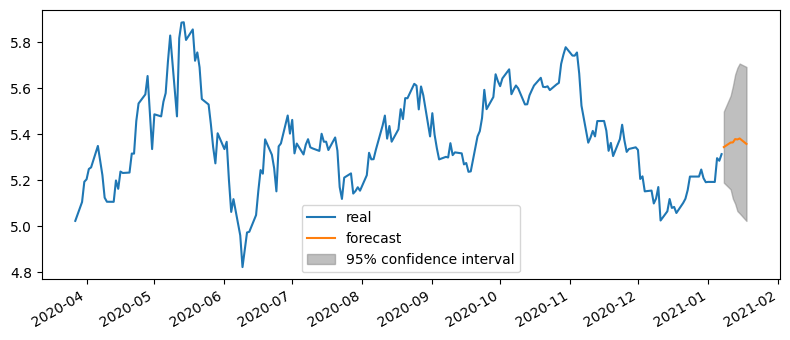

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict

fig, ax = plt.subplots(figsize=(8,3.5))
ax.plot(df,label='real')
plot_predict(results, start='2021-01-08', end='2021-01-17', ax=ax)

plt.tight_layout()
plt.show()

In [ ]:
results.predict(start='2021-01-08', end='2021-01-17')

2021-01-08    5.343582
2021-01-11    5.363227
2021-01-12    5.363856
2021-01-13    5.378191
2021-01-14    5.376743
2021-01-15    5.380980
2021-01-18    5.357225
Freq: B, Name: predicted_mean, dtype: float64

## Comparando com o valor real

Aqui, nada a fazer, apenas o dado real obtido para que você veja a qualidade da sua previsão.

In [ ]:
%%capture
!pip install yfinance

In [ ]:
import yfinance as yf

data = yf.download(['BRL=X'],'2021-01-18','2021-01-19')
dolar = data['Adj Close']
dolar

[*********************100%%**********************]  1 of 1 completed


Date
2021-01-18    5.2913
Name: Adj Close, dtype: float64

# Variações do Tema

1. Aqui você implementou um modelo MA, ARIMA(p=0,d=0,q=8). Importante você saber como determinar também os parâmetros p e d para implementar o modelo AR, ARMA e ARIMA.

2. Aqui o código para construção do modelo foi completamente fornecido. Pode não ser sempre assim...